In [1]:
import sklearn.metrics
import autosklearn.regression
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('0005.hk','2015-01-01','2020-01-01')
X=np.array(np.array(data.drop(["Adj Close","Volume"],1)))
y=np.array(data["Adj Close"])

[*********************100%***********************]  1 of 1 completed


In [3]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)

In [5]:
# !nproc --ignore=18
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    memory_limit=5000,
)
automl.fit(X_train, y_train)

AutoSklearnRegressor(memory_limit=5000, per_run_time_limit=30,
                     time_left_for_this_task=120)

In [6]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost   duration
model_id                                                              
34           1             0.34     random_forest  0.210128   0.982873
39           2             0.46     random_forest  0.210491   2.315564
18           3             0.08  gaussian_process  0.216100   6.941334
40           4             0.02          adaboost  0.284716   0.414223
15           5             0.02    ard_regression  0.315709   0.239269
20           6             0.08  gaussian_process  0.391180  15.117921


In [7]:
print(automl.show_models())

[(0.460000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'power_transformer', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.01774990515227546, 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:random_forest:bootstrap': 'True', 'regressor:random_forest:criterion': 'mae', 'regressor:random_forest:max_depth': 'None', 'regressor:random_forest:max_features': 0.3041334768712717, 'regressor:random_forest:max_leaf_

In [8]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8466955588973752
Test R2 score: 0.7973953509608226


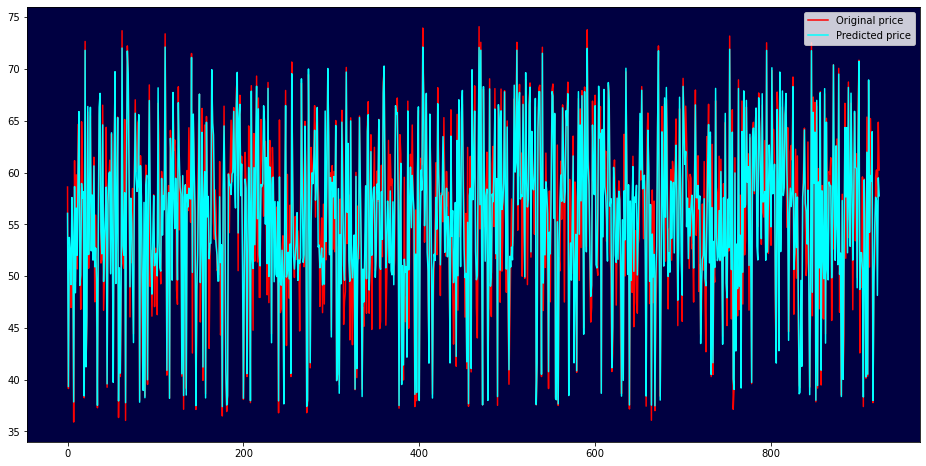

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_train, color='red', label='Original price')
plt.plot(train_predictions, color='cyan', label='Predicted price')
plt.legend()

[*********************100%***********************]  1 of 1 completed


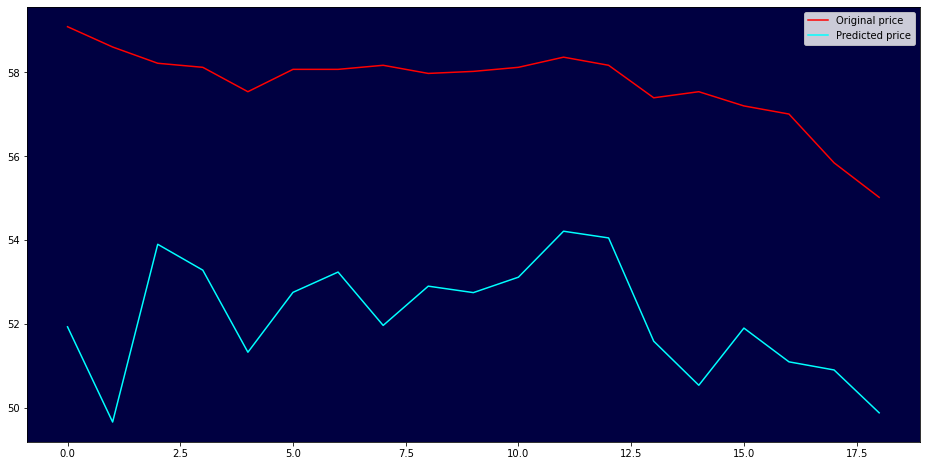

In [13]:
data_val=yf.download('0005.hk','2020-01-02','2020-01-31')
x_val=np.array(np.array(data_val.drop(["Adj Close","Volume"],1)))
y_val=np.array(data_val['Adj Close'])
predictions = automl.predict(x_val)
# predictions = scaler.inverse_transform(predictions.reshape(-1,1))
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_val, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [16]:
test=make_pipeline(StandardScaler(),autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    memory_limit=5000,
))
test.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('autosklearnregressor',
                 AutoSklearnRegressor(memory_limit=5000, per_run_time_limit=30,
                                      time_left_for_this_task=120))])

In [17]:
train_predictions = test.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = test.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8382082536735781
Test R2 score: 0.8006138767358573


[*********************100%***********************]  1 of 1 completed


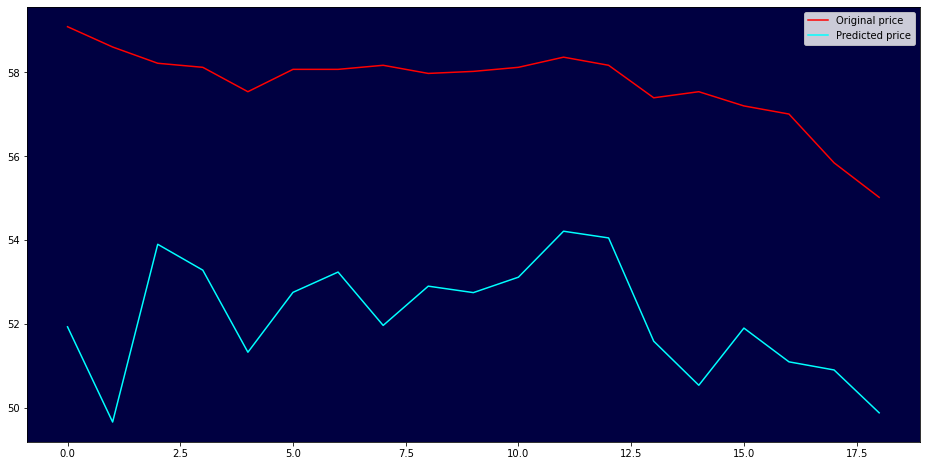

In [18]:
data_val=yf.download('0005.hk','2020-01-02','2020-01-31')
x_val=np.array(np.array(data_val.drop(["Adj Close","Volume"],1)))
y_val=np.array(data_val['Adj Close'])
predictions = automl.predict(x_val)
# predictions = scaler.inverse_transform(predictions.reshape(-1,1))
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_val, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()